# Regresión lineal

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías mas duraderas. Modelar estos datos podría ayudar a estimar la duración de batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo disposivo. Sea X la capacidad de almacenamiento de los smartphones (en TB) e Y la duración de su batería en días, con densidad de probabilidad conjunta de la forma:



$$p_{xy}(x,y) = \frac{3}{4} \cdot 𝟙{[0 \leq y \leq 1 + x^2,   0 \leq x \leq 1]}$$

### Librerias

Para realizar este trabajo práctico, se utilizaron las siguientes librerias:

In [ ]:
import numpy  as np
import pandas as pd
from time import time 
import matplotlib.pyplot as plt

from numpy.random import rand

### Gráfico del soporte de la densidad conjunta

Para tener un primer acercamiento al problema, se decidió graficar el soporte de la densidad conjunta.

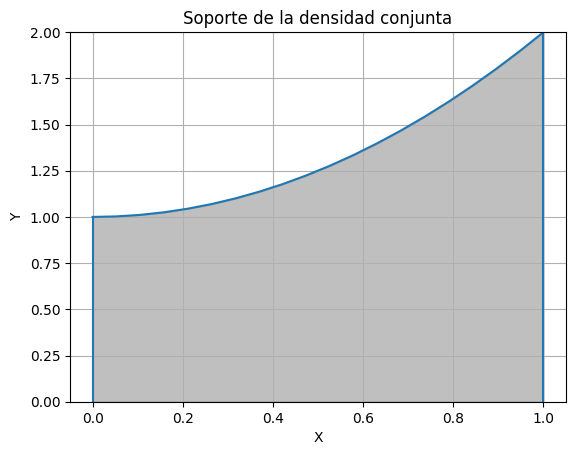

In [7]:
X = np.linspace(0, 1, 20)

Y = 1 + X**2

plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Búsqueda de la esperanza condicional

### Cálculo de la Función de Probabilidad de X

Sabemos que la funcion de densidad dada se puede calcular como:

$P_{XY}(x,y) = P_X(x) \cdot P(Y|X) $

Como la función de Probabilidad $P(Y|X)$ calcula la probabilidad de Y en base a un valor de X ya dado, sigue una distribucion uniforme entre 0 y la cota superior delimitada por la curva $1 + x^2$. Entonces, la funcion de probabilidad obtenida es la siguiente:

$$P(Y|X) = \frac{1}{1+x^2}𝟙{[0 \leq y \leq 1 + x^2]}.$$



Luego, la esperanza de una uniforme es su intervalo dividido 2:

$$ E[Y|X] = \frac{1+x^2}{2}. $$



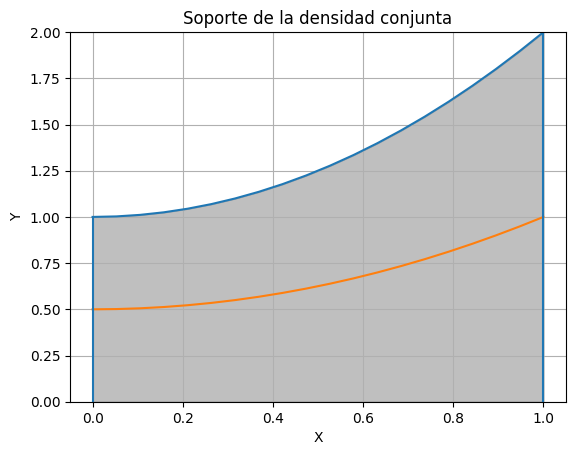

In [24]:
Yhat = (1 + X**2)/2

plt.plot(X, Y)
plt.plot(X, Yhat)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Luego, se procedió a calcular el error bayesiano, el cual se define como 
$$ E[Var(Y|X)], $$

Sabiendo que Y|X sigue una distribucion uniforme, la varianza de una uniforme se calcula como

$$ Var(U) = \frac{(b-a)^2}{12}, $$

entonces,

$$ Var(Y|X) = \frac{(1+x^2)^2} {12}. $$

Luego, se calculó la esperanza de la varianza anteriormente calculada:

$$ E[Var(Y|X)] = E[\frac{(1+x^2)^2} {12}] = \frac{1}{12} \cdot E[1 + 2x^2 + x^4].$$

Los momentos de orden K de X se calculan como

$$E[X^k] = \int_{0}^{1} X^k \cdot (1+X^2) \cdot \frac{3}{4} = \frac{3}{4}\cdot(\frac{1}{k+1}+\frac{1}{k+3}).$$


In [25]:
k_lista = [2, 4]
resultados = []

for k in k_lista:
    resultado = (3/4) * ((1/(k+1)) + (1/(k+3)))
    resultados.append(resultado)

error_bayesiano = (1/12) * (1 + 2*resultados[0] + resultados[1])
error_bayesiano


0.1714285714285714

Finalmente, el error bayesiano: 

$$ E[Var(Y|X)] \approx 0.171 $$